### Importing the Dataset

In [1]:
# reading the dataset 
import pandas as pd 
sms = pd.read_csv('SMSSpamCollection' , sep ='\t' , names=['Labels','Message'])


In [2]:
# Dataset Features
sms.head()

,Labels,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Using Natural Language Processing Methods to Process Text 

In [3]:
# Librarires for language processing 
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ratul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# creating the words corpus 
corpus =[]

for i in range(0 , len(sms)):
    corp = re.sub('[^a-zA-Z]',' ',sms['Message'][i])
    corp = corp.lower()
    corp = corp.split()
    
    corp = [ps.stem(word) for word in corp if not word in stopwords.words('english')]
    corp = ' '.join(corp)
    corpus.append(corp)    

In [5]:
#Bag of words 
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(max_features = 5000)
X = CV.fit_transform(corpus).toarray()

In [6]:
# Encoding the otput 
y = pd.get_dummies(sms['Labels'] , drop_first= True )

In [7]:
sms['Labels'].value_counts()

ham     4825
spam     747
Name: Labels, dtype: int64

### Data Splitting and Model Fitting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [23]:
from sklearn.naive_bayes import MultinomialNB
spam_model_NB = MultinomialNB().fit(X_train,y_train)
y_pred = spam_model_NB.predict(X_test)

C:\Users\ratul\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Model Validation

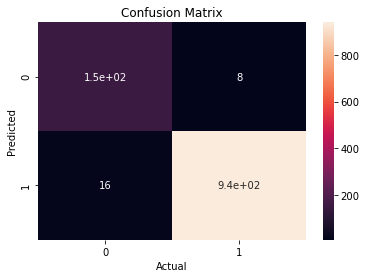

In [10]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
sns.heatmap(matrix, annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [11]:
# classification report for precision,recall,f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.95      0.93       160
           0       0.99      0.98      0.99       955

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [12]:
# recall and accuracy scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(accuracy)
print(recall)

0.97847533632287
0.95


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

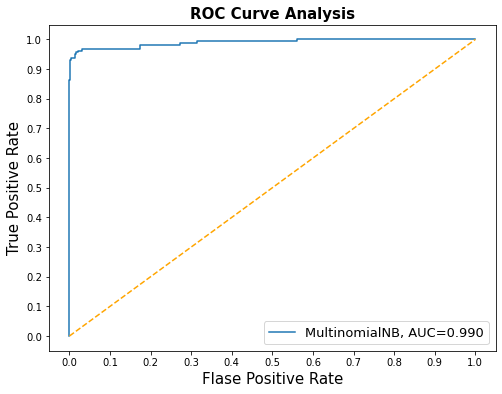

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [spam_model_NB]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    #model = cls.fit(X_train, y_train)
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

## Plotting the ROC with their respective AUC :

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Predictions

In [30]:
# Predicting for a nw mesage 
msg_spam = 'Win 2 free tickets for Olmpics.'
msgInput = CV.transform([msg_spam]).toarray()
y_pred_spam = spam_model_NB.predict(msgInput)
if(y_pred_spam[0]==1):
    print("Whoops!This is a Spam.")
else:
    print("This is a Real Message.")

Whoops!This is a Spam.


In [28]:
# Predicting for a nw mesage 
msg_ham  = 'Give that money to your mom. '
msgInput = CV.transform([msg_ham ]).toarray()
y_pred_ham = spam_model_NB.predict(msgInput)
if(y_pred_ham[0]==1):
    print("Whoops!This is a Spam.")
else:
    print("This is a Real Message.")

This is a Real Message.
